In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import random
import timeit

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


In [26]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, x)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [27]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1850 - val_loss: 0.1289
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1200 - val_loss: 0.1118
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1091 - val_loss: 0.1048
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1040 - val_loss: 0.1015
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1011 - val_loss: 0.0993
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0989 - val_loss: 0.0968
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0973 - val_loss: 0.0954
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0960 - val_loss: 0.0942
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0949 - val_loss: 0.0932
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0939 - val_loss: 0.0934

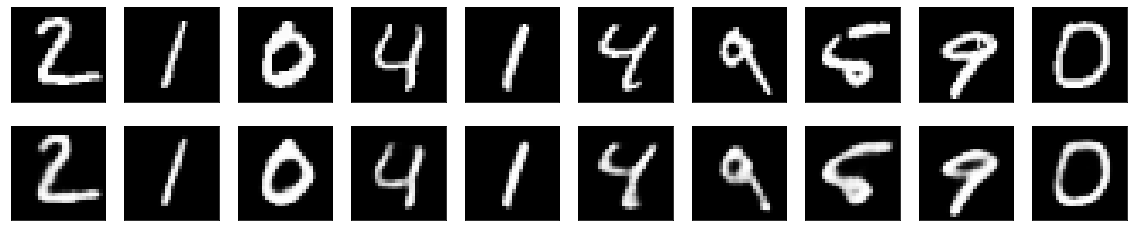

In [28]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()